In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset from the csv file
df=pd.read_csv("spam.csv",encoding="latin-1")

In [3]:
# Display the first few rows of the dataframe
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# Select relevant columns and rename them
df=df[['v1','v2']]
df.columns=['label','message']

In [5]:
# Display the first few rows of the dataframe to verify changes
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Display the full dataframe
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

/tmp/ipython-input-335671661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=le.fit_transform(df['label'])


In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.isnull().sum()

,0
label,0
message,0


In [7]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()

np.int64(403)

In [8]:
# Drop duplicate rows from the dataframe
df.drop_duplicates(inplace=True)

/tmp/ipython-input-159583866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [9]:
# Initialize CountVectorizer to convert text data into a matrix of token counts
# stop_words='english' removes common English words
cv=CountVectorizer(stop_words="english")
# Fit and transform the 'message' column to create the feature matrix (x)
x=cv.fit_transform(df['message']).toarray()
# Assign the 'label' column as the target variable (y)
y=df['label']

In [10]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
# Initialize and train the Multinomial Naive Bayes model
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [12]:
# Make predictions on the test set
y_pred=model.predict(x_test)

In [13]:
# Calculate and display the accuracy score
accuracy_score(y_test,y_pred)

0.9758220502901354

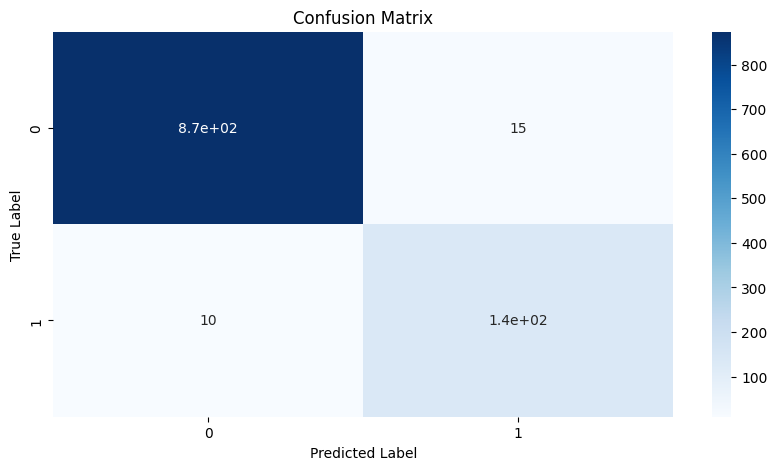

In [14]:
# Plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [15]:
# Function to predict if a message is spam or not
def predictMessage(text):
  # Transform the input text using the fitted CountVectorizer
  predict=cv.transform([text]).toarray()
  # Make a prediction using the trained model
  prediction=model.predict(predict)
  # Print the result based on the prediction
  if(prediction==0):
    print("Not Spam")
  else:
    print("spam")
# Test the function with a sample message
predictMessage("how are you")

spam


In [16]:
#Make a pickle file
import pickle
with open("model.pkl","wb") as f:
  pickle.dump(model,f)
